In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev= data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255




In [5]:
# print(Y_train)
# print(X_train)
print(X_train.shape)
print(X_train[0].shape)
print(X_train[:,0].shape)

(784, 41000)
(41000,)
(784,)


In [6]:
def init_params():
    W1 = np.random.rand(10, 784)-0.5
    B1 = np.random.rand(10, 1)-0.5
    W2 = np.random.rand(10, 10)-0.5
    B2 = np.random.rand(10, 1)-0.5
    return W1, B1, W2 , B2

def relU(z):
    return np.maximum(0,z)

def softmax(z):
    exp = np.exp(z - np.max(z))
    return exp / exp.sum(axis=0)

def forward_prop(w1, b1, w2, b2 , x):
    Z1 = w1.dot(x) +b1
    A1 = relU(Z1)
    
    Z2 = w2.dot(A1)+b2
    a2 = softmax(Z2)
    return Z1, A1, Z2, a2
    
    
def one_hot(Y):
    one_hot_y = np.zeros((Y.size, Y.max()+1))
    one_hot_y[np.arange(Y.size), Y]=1
    one_hot_y = one_hot_y.T
    return one_hot_y

def deriv_relu(Z):
    return Z>0
    
def back_prop(z1, a1, z2, a2, w2, x, y):
    m = y.size
    one_hot_y = one_hot(y)
    dz2 = a2-one_hot_y
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2)* deriv_relu(z1)
    dw1 = 1/m *dz1.dot(x.T)
    db1 = 1/m* np.sum(dz1)
    
    return dw1, db1, dw2 , db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, aplha):
    w1 = w1-aplha*dw1
    b1 = b1-aplha*db1
    w2 = w2-aplha*dw2
    b2 = b2-aplha*db2
    return w1, b1, w2, b2

In [7]:
def get_predictions(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions==Y)/Y.size

def gradient_descent(X, Y, iterations, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)
        dw1 , db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, X, Y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if(i%10==0):
            print('iterations: ', i)
            print("accuracy: ", get_accuracy(get_predictions(a2), Y))
    return w1, b1, w2, b2

In [8]:
w1, b1, w2, b2 = gradient_descent(X_train , Y_train , 500, 0.1)

iterations:  0
[7 7 7 ... 9 7 7] [1 6 2 ... 0 7 8]
accuracy:  0.09765853658536586
iterations:  10
[1 0 1 ... 0 1 3] [1 6 2 ... 0 7 8]
accuracy:  0.27634146341463417
iterations:  20
[1 0 1 ... 0 1 8] [1 6 2 ... 0 7 8]
accuracy:  0.3441463414634146
iterations:  30
[1 0 1 ... 0 1 8] [1 6 2 ... 0 7 8]
accuracy:  0.4036829268292683
iterations:  40
[1 0 1 ... 0 1 8] [1 6 2 ... 0 7 8]
accuracy:  0.45065853658536587
iterations:  50
[1 0 1 ... 0 1 8] [1 6 2 ... 0 7 8]
accuracy:  0.4982439024390244
iterations:  60
[1 8 6 ... 0 1 8] [1 6 2 ... 0 7 8]
accuracy:  0.5387804878048781
iterations:  70
[1 6 6 ... 0 1 8] [1 6 2 ... 0 7 8]
accuracy:  0.5746097560975609
iterations:  80
[1 6 6 ... 0 1 8] [1 6 2 ... 0 7 8]
accuracy:  0.6068536585365853
iterations:  90
[1 6 6 ... 0 2 8] [1 6 2 ... 0 7 8]
accuracy:  0.6324390243902439
iterations:  100
[1 6 6 ... 0 2 8] [1 6 2 ... 0 7 8]
accuracy:  0.6550487804878049
iterations:  110
[1 6 6 ... 0 2 8] [1 6 2 ... 0 7 8]
accuracy:  0.6738536585365854
iterations: 

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


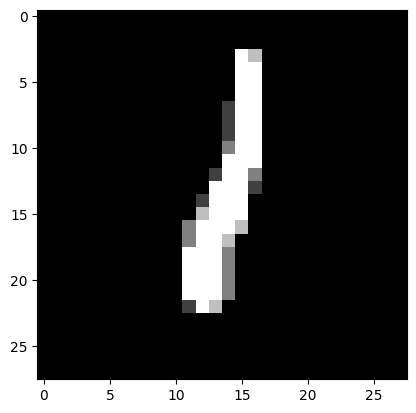

Prediction:  [6]
Label:  6


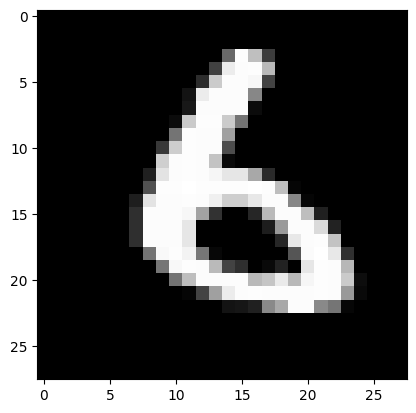

Prediction:  [6]
Label:  2


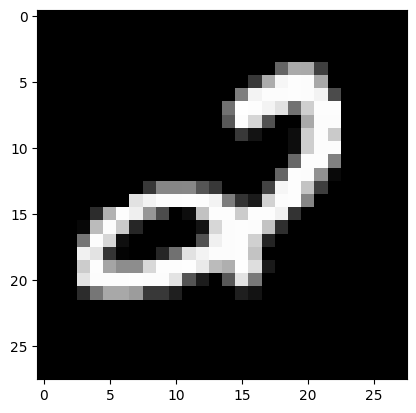

Prediction:  [1]
Label:  1


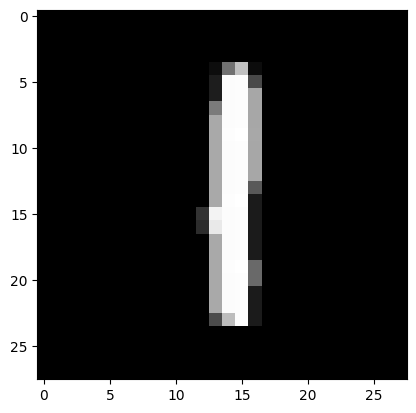

Prediction:  [2]
Label:  2


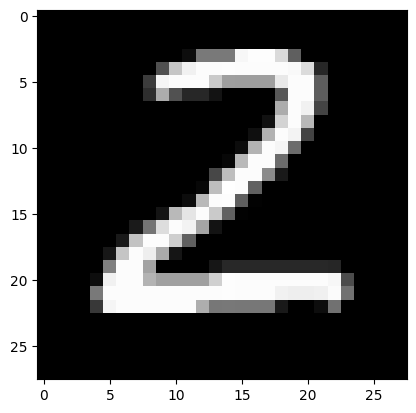

Prediction:  [5]
Label:  5


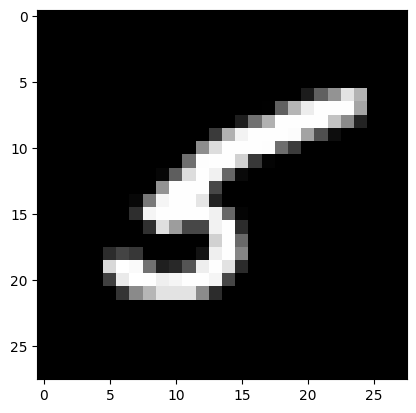

Prediction:  [8]
Label:  5


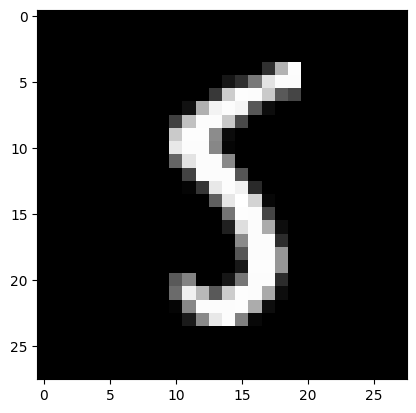

Prediction:  [6]
Label:  6


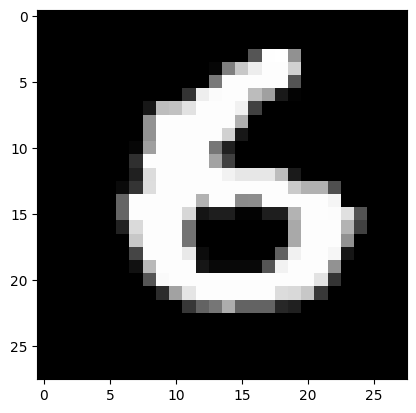

Prediction:  [1]
Label:  1


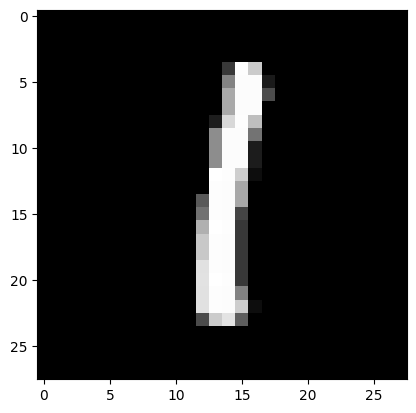

Prediction:  [1]
Label:  1


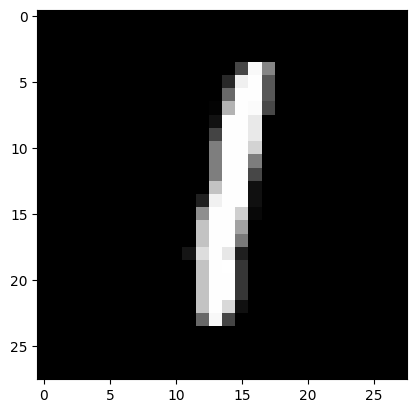

Prediction:  [7]
Label:  9


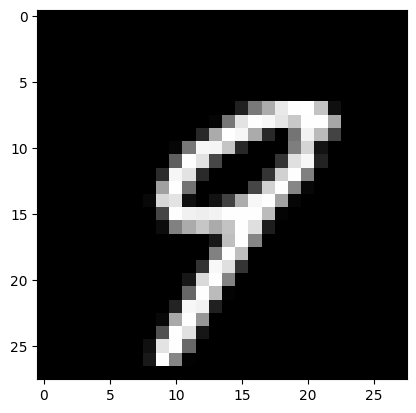

Prediction:  [8]
Label:  8


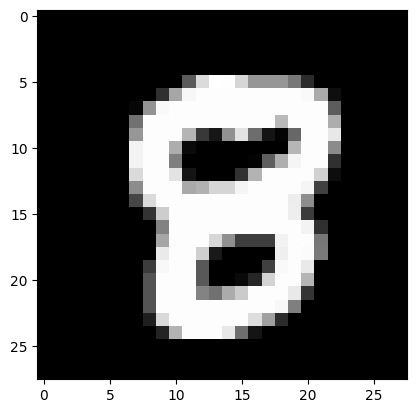

Prediction:  [4]
Label:  4


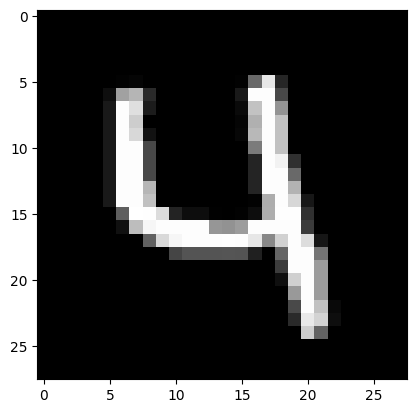

Prediction:  [5]
Label:  5


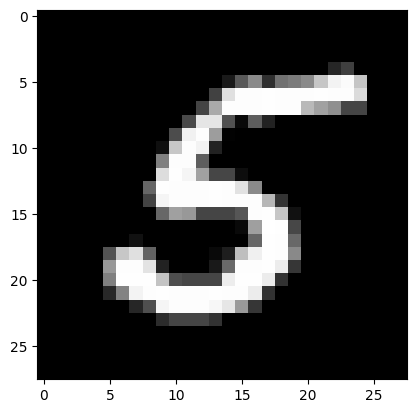

Prediction:  [5]
Label:  5


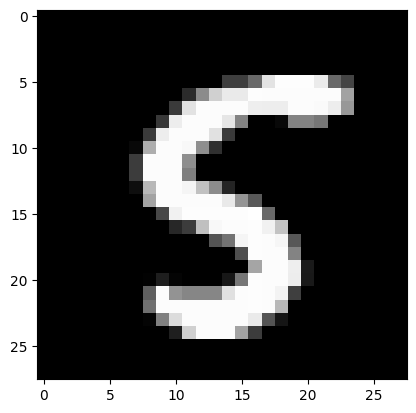

Prediction:  [2]
Label:  2


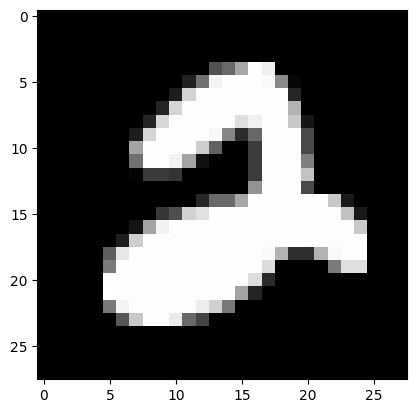

Prediction:  [3]
Label:  3


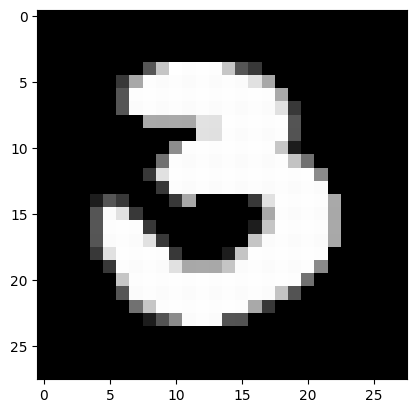

Prediction:  [0]
Label:  0


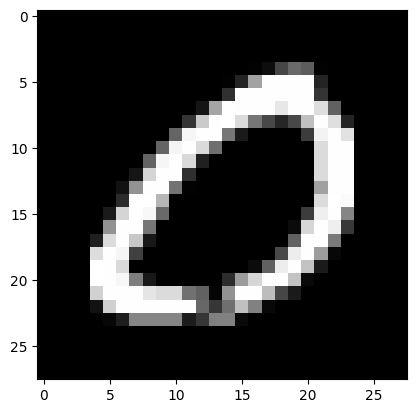

Prediction:  [7]
Label:  8


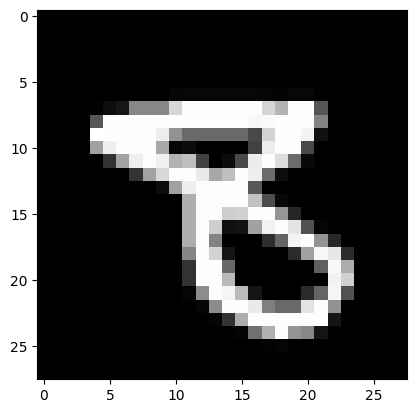

Prediction:  [5]
Label:  5


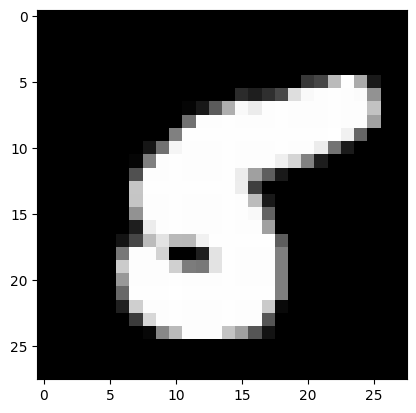

Prediction:  [3]
Label:  8


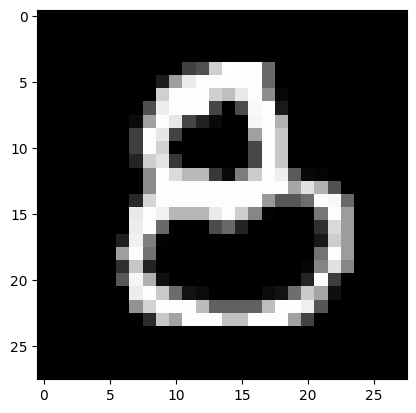

Prediction:  [9]
Label:  9


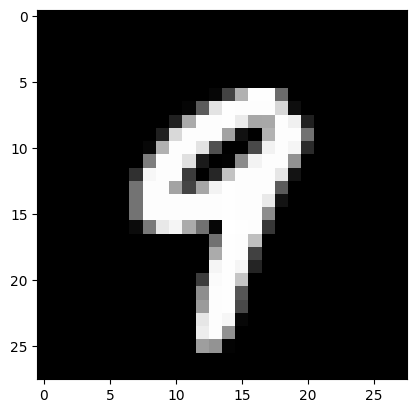

Prediction:  [5]
Label:  5


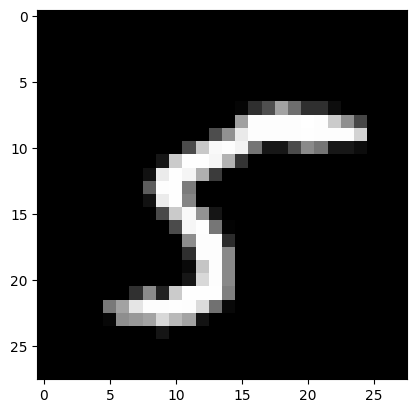

Prediction:  [2]
Label:  0


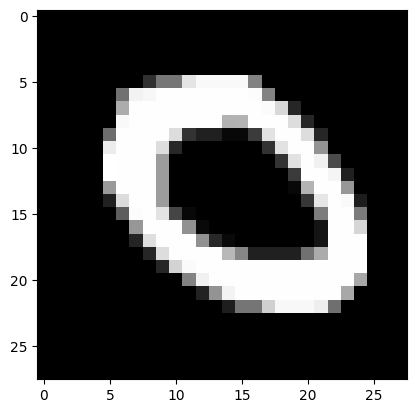

Prediction:  [4]
Label:  4


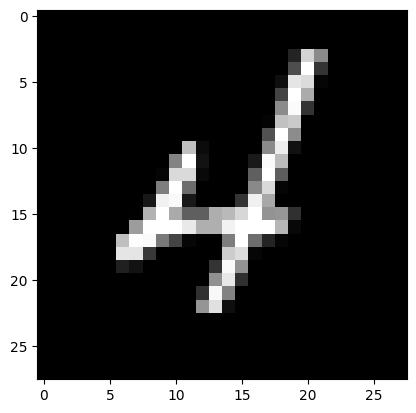

Prediction:  [1]
Label:  1


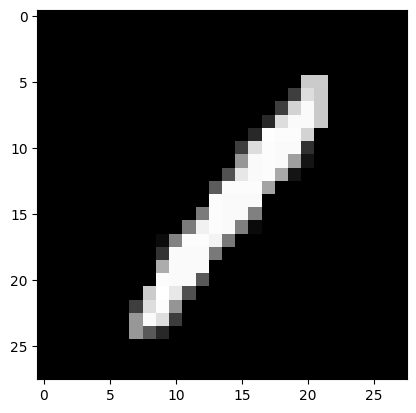

Prediction:  [0]
Label:  0


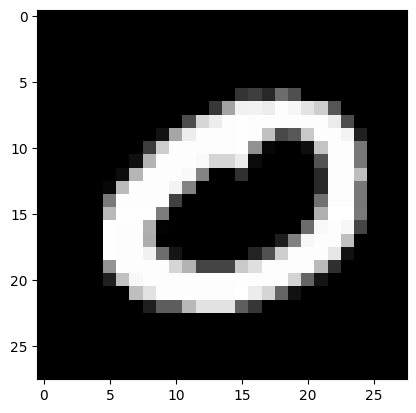

Prediction:  [8]
Label:  5


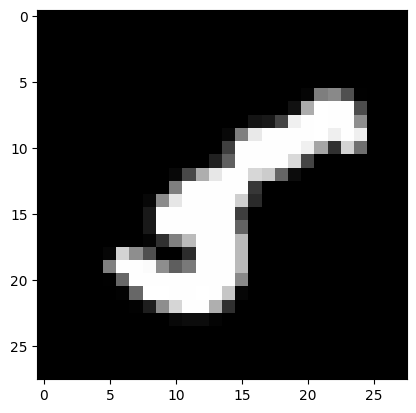

Prediction:  [3]
Label:  3


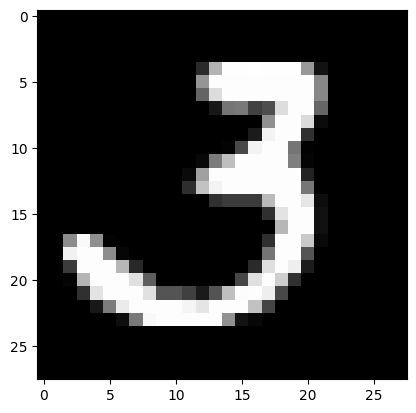

Prediction:  [0]
Label:  0


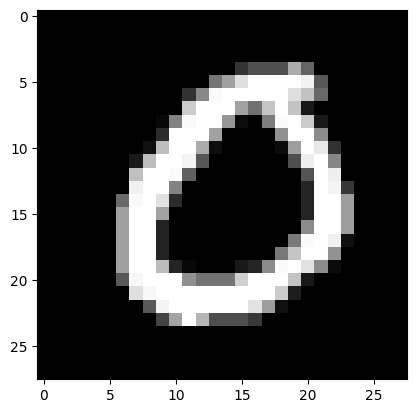

Prediction:  [7]
Label:  5


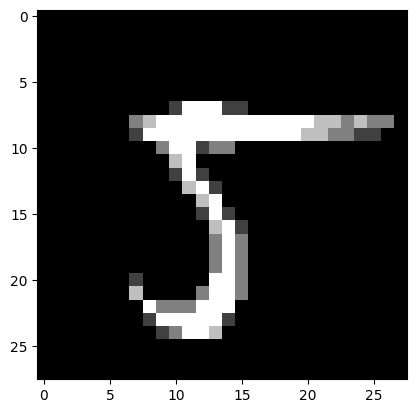

Prediction:  [1]
Label:  1


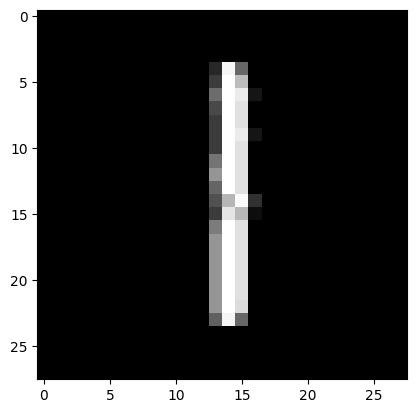

Prediction:  [1]
Label:  1


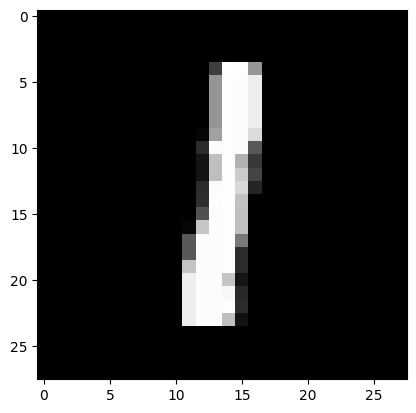

Prediction:  [4]
Label:  4


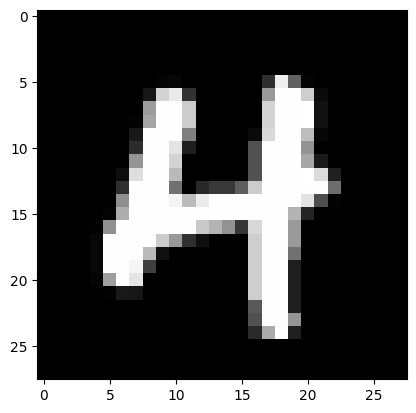

Prediction:  [5]
Label:  5


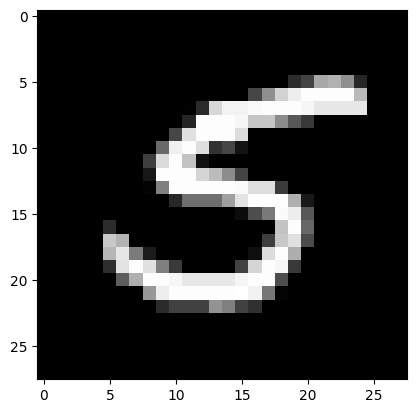

Prediction:  [4]
Label:  4


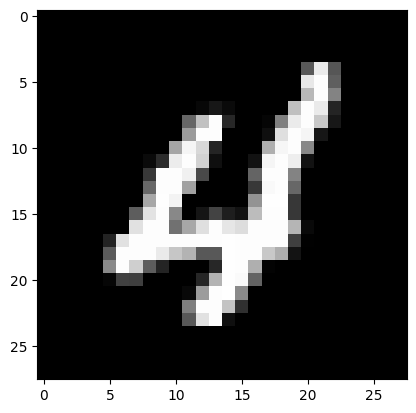

Prediction:  [1]
Label:  1


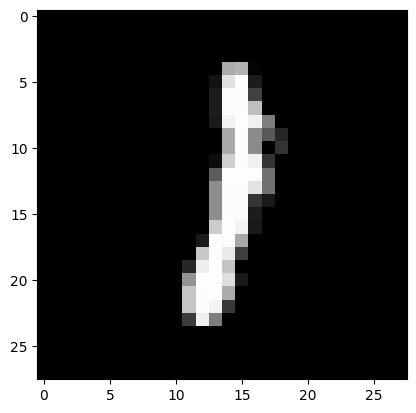

Prediction:  [6]
Label:  6


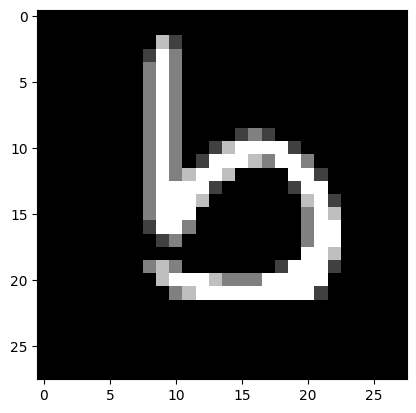

Prediction:  [4]
Label:  9


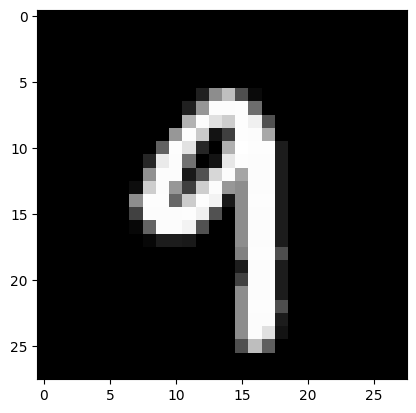

Prediction:  [1]
Label:  1


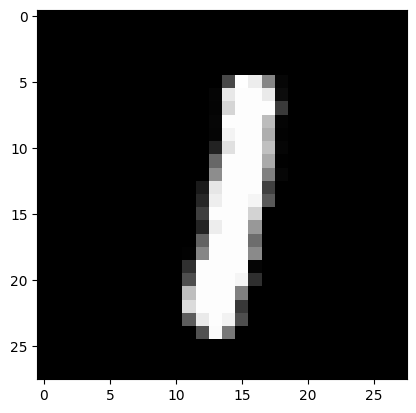

Prediction:  [2]
Label:  2


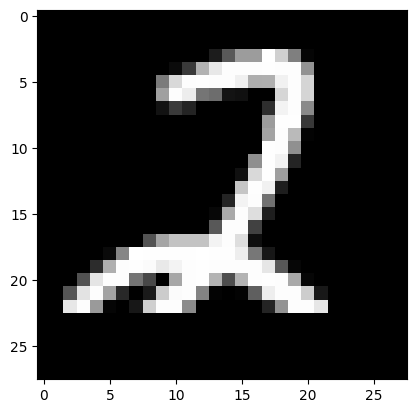

Prediction:  [2]
Label:  2


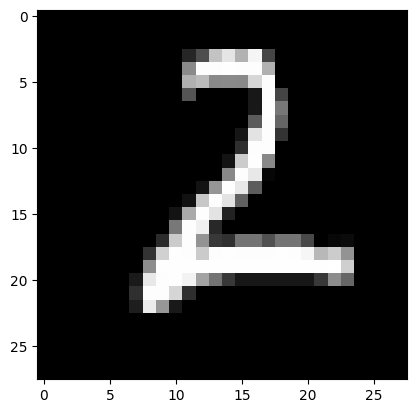

Prediction:  [0]
Label:  0


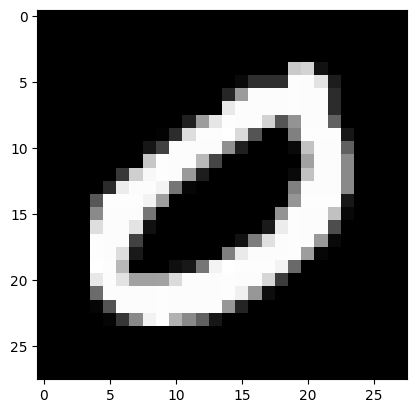

Prediction:  [8]
Label:  8


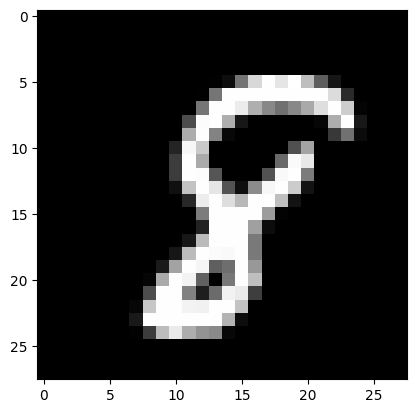

Prediction:  [9]
Label:  9


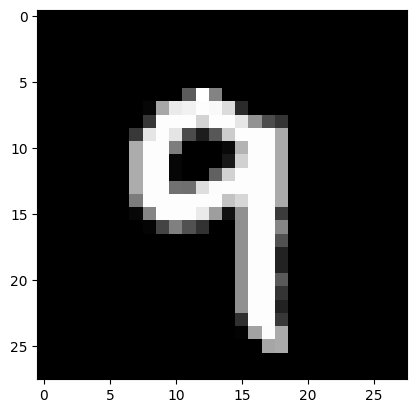

Prediction:  [0]
Label:  0


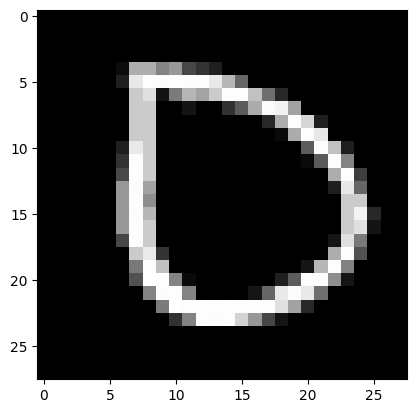

Prediction:  [3]
Label:  3


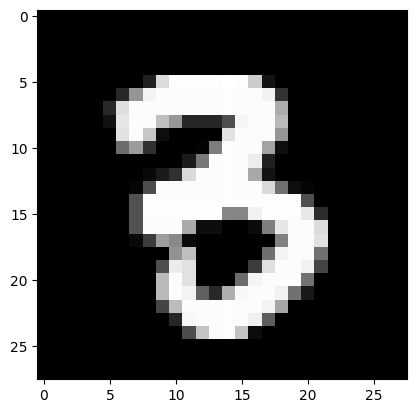

Prediction:  [1]
Label:  1


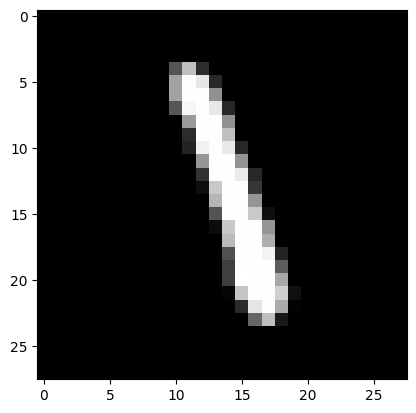

Prediction:  [2]
Label:  2


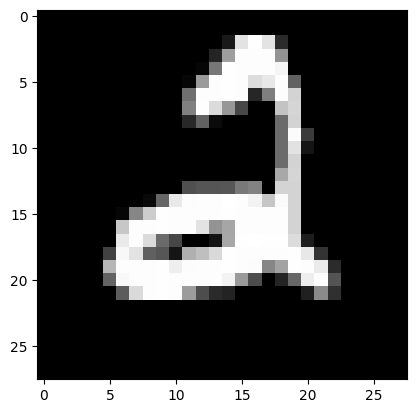

Prediction:  [3]
Label:  3


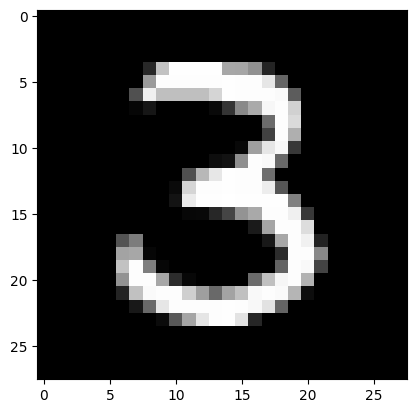

In [10]:
for i in range(50):
    test_prediction(i, w1, b1, w2, b2)
